### Bhagyashree Deshpande

# Prepare a model for glass classification using KNN

## Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_validate,cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
glass_data = pd.read_csv('glass.csv')
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Understanding Data

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


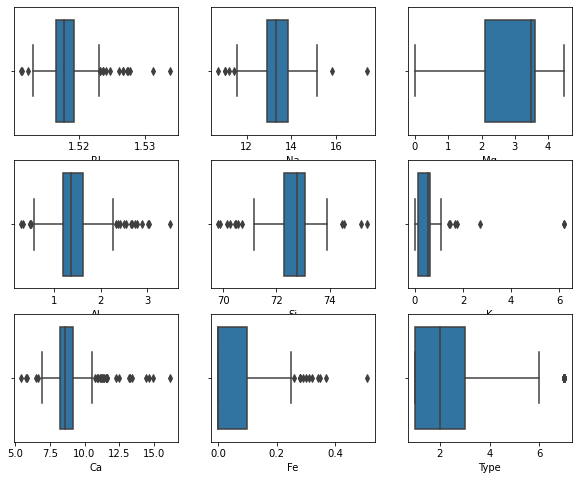

In [8]:
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.boxplot(glass_data.RI)
plt.subplot(3,3,2)
sns.boxplot(glass_data.Na)
plt.subplot(3,3,3)
sns.boxplot(glass_data.Mg)
plt.subplot(3,3,4)
sns.boxplot(glass_data.Al)
plt.subplot(3,3,5)
sns.boxplot(glass_data.Si)
plt.subplot(3,3,6)
sns.boxplot(glass_data.K)
plt.subplot(3,3,7)
sns.boxplot(glass_data.Ca)
plt.subplot(3,3,8)
sns.boxplot(glass_data.Fe)
plt.subplot(3,3,9)
sns.boxplot(glass_data.Type);

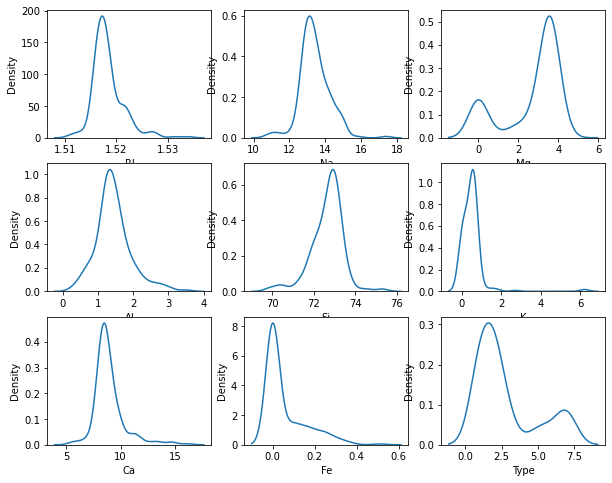

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.kdeplot(glass_data.RI)
plt.subplot(3,3,2)
sns.kdeplot(glass_data.Na)
plt.subplot(3,3,3)
sns.kdeplot(glass_data.Mg)
plt.subplot(3,3,4)
sns.kdeplot(glass_data.Al)
plt.subplot(3,3,5)
sns.kdeplot(glass_data.Si)
plt.subplot(3,3,6)
sns.kdeplot(glass_data.K)
plt.subplot(3,3,7)
sns.kdeplot(glass_data.Ca)
plt.subplot(3,3,8)
sns.kdeplot(glass_data.Fe)
plt.subplot(3,3,9)
sns.kdeplot(glass_data.Type);

## Model Building

In [10]:
X = glass_data.drop(labels = 'Type', axis = 1)
y = glass_data[['Type']]

In [11]:
X.shape, y.shape

((214, 9), (214, 1))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13, shuffle = True, stratify = y)

In [13]:
X_train.shape, y_train.shape

((171, 9), (171, 1))

In [14]:
X_test.shape, y_test.shape

((43, 9), (43, 1))

## Model Training || Model Testing || Model Evaluation

#### For k = 3

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.807


#### For k = 5

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.7602


#### For k = 7

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.7076


#### For k = 9

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.6842


### Apply Standardization as it is working on Distance based concept

In [27]:
std_scaler = StandardScaler()
X1 = std_scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

#### For k = 3

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.8363


#### For k = 5

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.7602


#### For k = 7

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.7368


#### For k = 9

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.6901


In [25]:
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
cv_scores = []

In [31]:
for i in range(1,35):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_val_scores = cross_val_score(estimator=knn_model, X = X1, y=y, cv = kfold)
    print(i, 'th Iteration :\n', cross_val_scores.mean().round(4))
    cv_scores.append(cross_val_scores.mean().round(4))

1 th Iteration :
 0.7239
2 th Iteration :
 0.6911
3 th Iteration :
 0.6865
4 th Iteration :
 0.668
5 th Iteration :
 0.6449
6 th Iteration :
 0.6587
7 th Iteration :
 0.6494
8 th Iteration :
 0.668
9 th Iteration :
 0.6167
10 th Iteration :
 0.6446
11 th Iteration :
 0.64
12 th Iteration :
 0.6308
13 th Iteration :
 0.6121
14 th Iteration :
 0.6168
15 th Iteration :
 0.6307
16 th Iteration :
 0.6308
17 th Iteration :
 0.6166
18 th Iteration :
 0.6167
19 th Iteration :
 0.6072
20 th Iteration :
 0.6025
21 th Iteration :
 0.6027
22 th Iteration :
 0.6121
23 th Iteration :
 0.6027
24 th Iteration :
 0.6074
25 th Iteration :
 0.5887
26 th Iteration :
 0.5795
27 th Iteration :
 0.5749
28 th Iteration :
 0.5889
29 th Iteration :
 0.5464
30 th Iteration :
 0.5465
31 th Iteration :
 0.5511
32 th Iteration :
 0.5792
33 th Iteration :
 0.5651
34 th Iteration :
 0.5606


In [32]:
cv_scores

[0.7239,
 0.6911,
 0.6865,
 0.668,
 0.6449,
 0.6587,
 0.6494,
 0.668,
 0.6167,
 0.6446,
 0.64,
 0.6308,
 0.6121,
 0.6168,
 0.6307,
 0.6308,
 0.6166,
 0.6167,
 0.6072,
 0.6025,
 0.6027,
 0.6121,
 0.6027,
 0.6074,
 0.7239,
 0.6911,
 0.6865,
 0.668,
 0.6449,
 0.6587,
 0.6494,
 0.668,
 0.6167,
 0.6446,
 0.64,
 0.6308,
 0.6121,
 0.6168,
 0.6307,
 0.6308,
 0.6166,
 0.6167,
 0.6072,
 0.6025,
 0.6027,
 0.6121,
 0.6027,
 0.6074,
 0.5887,
 0.5795,
 0.5749,
 0.5889,
 0.5464,
 0.5465,
 0.5511,
 0.5792,
 0.5651,
 0.5606]

In [33]:
max(cv_scores)

0.7239

In [34]:
cv_scores.index(max(cv_scores))

0

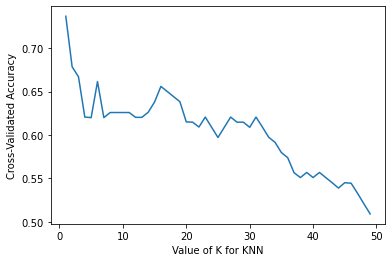

In [37]:
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Concluion
From the above KNN models, we observe that k = 3 gives better accuracy.

## ========================================================================

# Implement a KNN model to classify the animals into categories

## Import Necessary Libraries

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
zoo_data = pd.read_csv('zoo.csv')
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Data Understanding

In [4]:
zoo_data.shape

(101, 18)

In [5]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [8]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
zoo_data.drop(['animal name'], axis = 1, inplace = True)

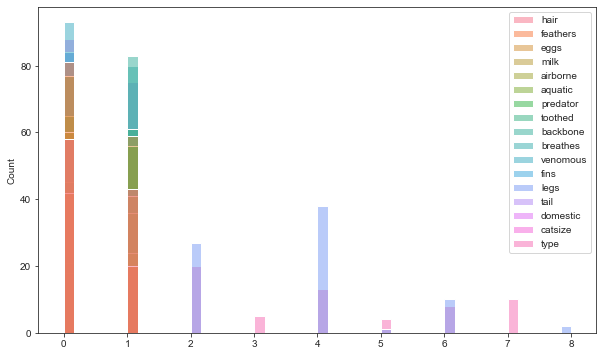

In [10]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.histplot(data = zoo_data);

## Model Building

In [11]:
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
X = zoo_data.drop(labels = 'type', axis = 1)
y = zoo_data[['type']]

In [13]:
X.shape, y.shape

((101, 16), (101, 1))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=13, stratify = y, shuffle=True)

In [15]:
X_train.shape, y_train.shape

((80, 16), (80, 1))

In [16]:
X_test.shape, y_test.shape

((21, 16), (21, 1))

## Model Training || Model Testing || Model Evaluation

### For k = 3

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred),4))

Accuracy Score:  0.975


### For k = 5

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred),4))

Accuracy Score:  0.9375


### For k = 7

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred),4))

Accuracy Score:  0.925


### For k = 9

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred),4))

Accuracy Score:  0.8625


### Apply Standardization as it is working on Distance based concept

In [24]:
std_scaler = StandardScaler()
X1 = std_scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

#### For k = 3

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.9875


#### For k = 5

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.95


#### For k = 7

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.8625


#### For k = 9

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train)
print('Accuracy Score: ', round(accuracy_score(y_train, y_pred), 4))

Accuracy Score:  0.7875


In [38]:
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
cv_scores = []

for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_val_scores = cross_val_score(estimator=knn_model, X = X1, y=y, cv = kfold)
    print(i, 'th Iteration :\n', cross_val_scores.mean().round(4))
    cv_scores.append(cross_val_scores.mean().round(4))

1 th Iteration :
 0.9105
2 th Iteration :
 0.9105
3 th Iteration :
 0.8905
4 th Iteration :
 0.8905
5 th Iteration :
 0.9005
6 th Iteration :
 0.881
7 th Iteration :
 0.8805
8 th Iteration :
 0.8705
9 th Iteration :
 0.8405
10 th Iteration :
 0.8405
11 th Iteration :
 0.8205
12 th Iteration :
 0.8205
13 th Iteration :
 0.8005
14 th Iteration :
 0.811
15 th Iteration :
 0.811
16 th Iteration :
 0.811
17 th Iteration :
 0.811
18 th Iteration :
 0.811
19 th Iteration :
 0.811
20 th Iteration :
 0.801
21 th Iteration :
 0.801
22 th Iteration :
 0.801
23 th Iteration :
 0.801
24 th Iteration :
 0.791
25 th Iteration :
 0.781
26 th Iteration :
 0.781
27 th Iteration :
 0.771
28 th Iteration :
 0.761
29 th Iteration :
 0.761
30 th Iteration :
 0.741
31 th Iteration :
 0.7214
32 th Iteration :
 0.7019
33 th Iteration :
 0.6919
34 th Iteration :
 0.6919
35 th Iteration :
 0.6819
36 th Iteration :
 0.6819
37 th Iteration :
 0.6719
38 th Iteration :
 0.6519
39 th Iteration :
 0.6224


In [39]:
cv_scores

[0.9105,
 0.9105,
 0.8905,
 0.8905,
 0.9005,
 0.881,
 0.8805,
 0.8705,
 0.8405,
 0.8405,
 0.8205,
 0.8205,
 0.8005,
 0.811,
 0.811,
 0.811,
 0.811,
 0.811,
 0.811,
 0.801,
 0.801,
 0.801,
 0.801,
 0.791,
 0.781,
 0.781,
 0.771,
 0.761,
 0.761,
 0.741,
 0.7214,
 0.7019,
 0.6919,
 0.6919,
 0.6819,
 0.6819,
 0.6719,
 0.6519,
 0.6224]

In [40]:
max(cv_scores)

0.9105

In [41]:
cv_scores.index(max(cv_scores))

0

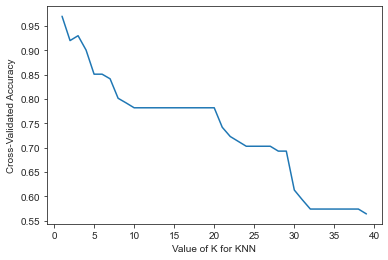

In [44]:
k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Conclusion
From the above KNN models, we observe that k = 3 gives better accuracy.